1.Autoencoders: In this task, consider the MNIST dataset for training autoencoder models (with
a suitable regularization) with hidden (latent) dimension of 32, and 64.

(a) Report the train and test reconstruction errors for the three models (display about 10 recon-
structions from the train and test data each).

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Loading and preparing the Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the architecture of Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super(Autoencoder, self).__init__()

        self.latent_dim = latent_dim

        # Defining encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )

        self.fc_latent = nn.Linear(64*7*7, latent_dim)

        # Defining decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64*7*7),
            nn.ReLU(),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    # Defining foreward loop
    def forward(self, x):
        # Encoder
        x = self.encoder(x)
        latent = self.fc_latent(x)

        # Decoder
        x_recon = self.decoder(latent)

        return x_recon

# Defining the Loss Function with L2 Regularization
def autoencoder_loss(recon_x, x, model):
    recon_loss = nn.MSELoss(reduction='sum')(recon_x, x)
    l2_reg = 0.0
    for param in model.parameters():
        # Calculating L2 norm without requiring gradients
        l2_reg += torch.norm(param, p=2)
    # Adjusting regularization strength as needed
    return recon_loss + 0.001 * l2_reg

# Training Loop
def train_autoencoder(autoencoder, trainloader, testloader, num_epochs=10, learning_rate=1e-3):
    optimizer = optim.RMSprop(autoencoder.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, _ = data

            optimizer.zero_grad()

            recon_batch = autoencoder(inputs)
            loss = autoencoder_loss(recon_batch, inputs, autoencoder)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(trainloader)
        train_losses.append(train_loss)

        test_loss = 0.0
        with torch.no_grad():
            for data in testloader:
                inputs, _ = data
                recon_batch = autoencoder(inputs)
                loss = autoencoder_loss(recon_batch, inputs, autoencoder)
                test_loss += loss.item()

        test_loss /= len(testloader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Test Loss: {test_loss}")

    return train_losses, test_losses


# Instantiating the Autoencoder models
autoencoder_32 = Autoencoder(latent_dim=32)
autoencoder_64 = Autoencoder(latent_dim=64)

# Training the Autoencoder models
print("Training autoencoder_32: ")
train_losses_32, test_losses_32 = train_autoencoder(autoencoder_32, trainloader, testloader, num_epochs=10)
print("Training autoencoder_64: ")
train_losses_64, test_losses_64 = train_autoencoder(autoencoder_64, trainloader, testloader, num_epochs=10)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 53864386.17it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1600101.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13326572.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3370581.88it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training autoencoder_32: 
Epoch 1, Train Loss: 1004.6868143142667, Test Loss: 403.97153030687076
Epoch 2, Train Loss: 395.70237526964786, Test Loss: 300.24242639237906
Epoch 3, Train Loss: 318.48415985595443, Test Loss: 262.07048569211537
Epoch 4, Train Loss: 281.9387479021605, Test Loss: 242.07561947281954
Epoch 5, Train Loss: 259.318620571958, Test Loss: 230.9062172713553
Epoch 6, Train Loss: 243.90278006515015, Test Loss: 220.43655662779597
Epoch 7, Train Loss: 232.94388629124362, Test Loss: 213.55372060787906
Epoch 8, Train Loss: 224.21273607689182, Test Loss: 210.4360870798682
Epoch 9, Train Loss: 217.31861199092256, Test Loss: 205.7526918156132
Epoch 10, Train Loss: 211.83014384515758, Test Loss: 199.749491770556
Training autoencoder_64: 
Epoch 1, Train Loss: 884.908340519171, Test Loss: 308.21207969811314
Epoch 2, Train Loss: 294.6988256003048, Test Loss: 217.72251291943203
Epoch 3, Train Loss: 213.86257924809894, Test Loss: 163.0157054731041
Epoch 4, Train Loss: 176.71610496699

Reconstructions from the Autoencoder with 32-dimensional Latent Space with train dataset:


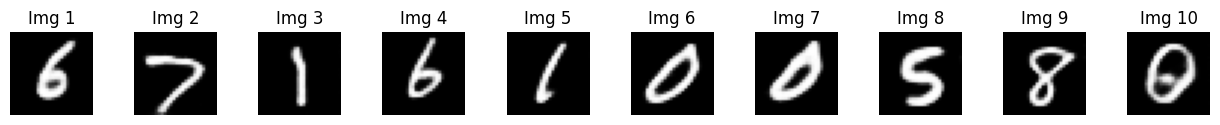


Reconstructions from the Autoencoder with 32-dimensional Latent Space with test dataset:


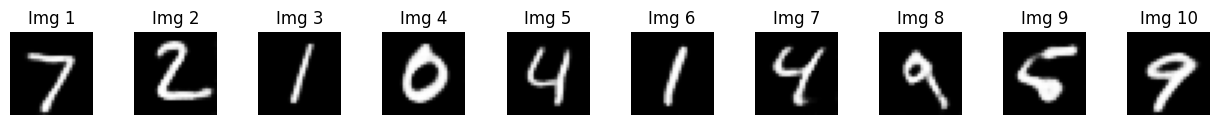


Reconstructions from the Autoencoder with 64-dimensional Latent Space with train dataset:


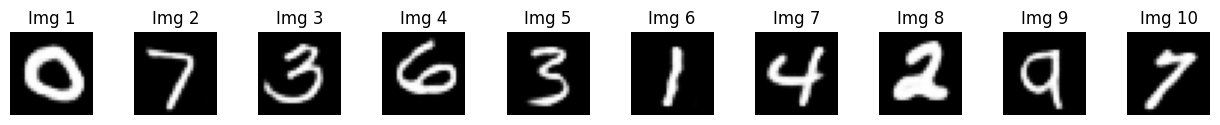


Reconstructions from the Autoencoder with 64-dimensional Latent Space with test dataset:


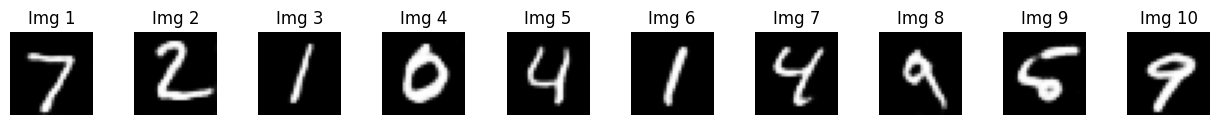

In [3]:
# Defining function to print images
def visualize_reconstructions(autoencoder, dataloader, num_images=10, padding=0.1):
    with torch.no_grad():
        for inputs, _ in dataloader:
            break
        reconstructed_images = autoencoder(inputs).view(-1, 1, 28, 28)

    plt.figure(figsize=(15, 3))
    plt.subplots_adjust(wspace=0.5)

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(reconstructed_images[i].squeeze().numpy(), cmap='gray')
        plt.axis('off')
        plt.title(f'Img {i+1}')

        plt.subplots_adjust(left=padding, right=1-padding, top=1-padding, bottom=padding)
    plt.show()


# Visualizing reconstructions from train and test data
print("Reconstructions from the Autoencoder with 32-dimensional Latent Space with train dataset:")
visualize_reconstructions(autoencoder_32, trainloader)
print("\nReconstructions from the Autoencoder with 32-dimensional Latent Space with test dataset:")
visualize_reconstructions(autoencoder_32, testloader)

print("\nReconstructions from the Autoencoder with 64-dimensional Latent Space with train dataset:")
visualize_reconstructions(autoencoder_64, trainloader)
print("\nReconstructions from the Autoencoder with 64-dimensional Latent Space with test dataset:")
visualize_reconstructions(autoencoder_64, testloader)

In [4]:
# Reporting train and test reconstruction errors
print("Train Reconstruction Errors (Autoencoder with 32-dimensional Latent Space):", train_losses_32)
print("Test Reconstruction Errors (Autoencoder with 32-dimensional Latent Space):", test_losses_32)
print("Train Reconstruction Errors (Autoencoder with 64-dimensional Latent Space):", train_losses_64)
print("Test Reconstruction Errors (Autoencoder with 64-dimensional Latent Space):", test_losses_64)

Train Reconstruction Errors (Autoencoder with 32-dimensional Latent Space): [1004.6868143142667, 395.70237526964786, 318.48415985595443, 281.9387479021605, 259.318620571958, 243.90278006515015, 232.94388629124362, 224.21273607689182, 217.31861199092256, 211.83014384515758]
Test Reconstruction Errors (Autoencoder with 32-dimensional Latent Space): [403.97153030687076, 300.24242639237906, 262.07048569211537, 242.07561947281954, 230.9062172713553, 220.43655662779597, 213.55372060787906, 210.4360870798682, 205.7526918156132, 199.749491770556]
Train Reconstruction Errors (Autoencoder with 64-dimensional Latent Space): [884.908340519171, 294.6988256003048, 213.86257924809894, 176.71610496699938, 154.69505695595163, 140.7314192237122, 130.88319576320364, 123.59966793751666, 117.96484130989514, 113.74501395073018]
Test Reconstruction Errors (Autoencoder with 64-dimensional Latent Space): [308.21207969811314, 217.72251291943203, 163.0157054731041, 144.88071653038074, 127.57979821855096, 119.437

(b) Perform the reconstruction on the line joining two training data samples in the hidden space. Consider at least 5 pairs of samples.

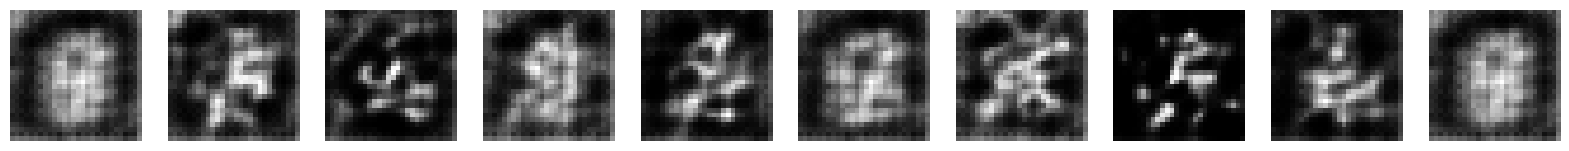

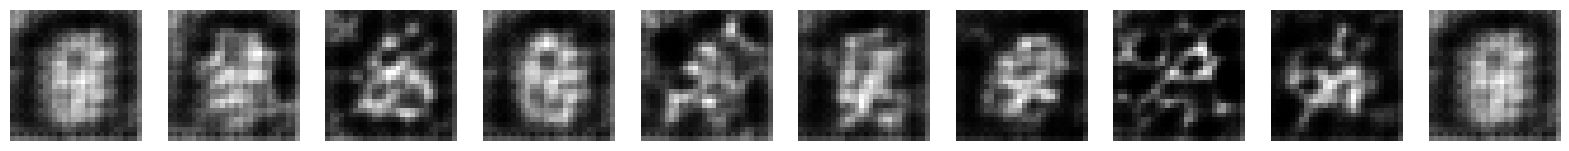

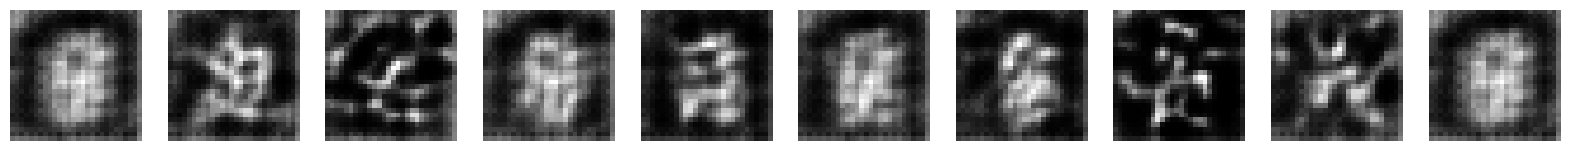

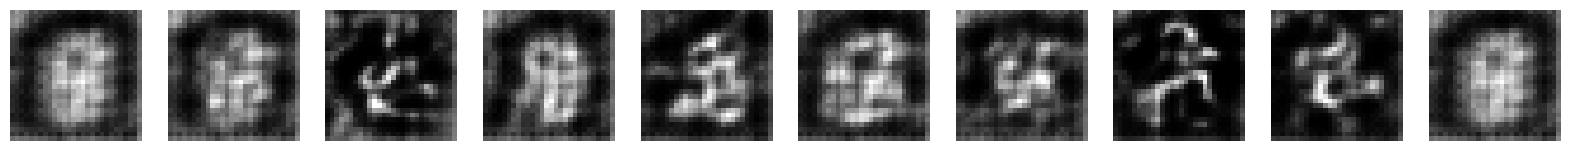

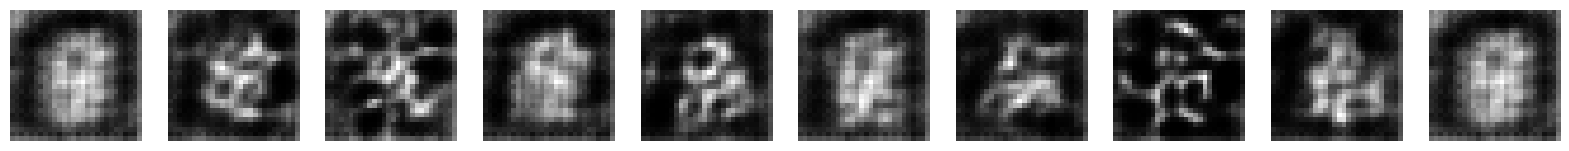

In [5]:
import torch
import matplotlib.pyplot as plt

# Defining function to interpolate between two latent vectors.
def interpolate_latent(latent1, latent2, steps=10):
    vectors = []
    for i in range(steps + 1):
        alpha = i / steps
        vector = (1 - alpha) * latent1 + alpha * latent2
        vectors.append(vector)
    return torch.stack(vectors)

# Defining function to perform reconstruction on the interpolated latent vectors.
def reconstruct_from_latent(interpolated_latent, autoencoder):
    with torch.no_grad():
        # Reshaping the interpolated latent vectors to match the input size expected by the linear layer
        interpolated_latent = interpolated_latent.view(-1, autoencoder.latent_dim)
        reconstructed_images = autoencoder.decoder(interpolated_latent)
    return reconstructed_images


# Choosing at least 5 pairs of samples from the training data
pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

for pair in pairs:
    sample1, _ = trainset[pair[0]]
    sample2, _ = trainset[pair[1]]

    # Encoding the samples to obtain their latent representations
    latent1 = autoencoder_64.encoder(sample1.unsqueeze(0)).squeeze()  # Assuming autoencoder_64 is used
    latent2 = autoencoder_64.encoder(sample2.unsqueeze(0)).squeeze()  # Assuming autoencoder_64 is used

    # Interpolating between the latent representations
    interpolated_latent = interpolate_latent(latent1, latent2, steps=10)

    # Reconstructing images from the interpolated latent vectors
    reconstructed_images = reconstruct_from_latent(interpolated_latent, autoencoder_64)

    # Plotting the reconstructed images
    plt.figure(figsize=(20, 4))
    for i in range(len(reconstructed_images)):
        plt.subplot(2, 10, i % 10 + 1)
        plt.imshow(reconstructed_images[i][0], cmap='gray')
        plt.axis('off')
    plt.show()


2.Variational Autoencoder (VAE): Train a VAE (on MNIST dataset) for the tasks of generating MNIST-like digits. Encoder learns a distribution in 16D space. After successfully training the VAE, generate 64 images and display.

Epoch 1, Loss: 9607.349196574327
Epoch 2, Loss: 7322.803918378948
Epoch 3, Loss: 7038.37388288746
Epoch 4, Loss: 6898.665525261527
Epoch 5, Loss: 6813.89654007446
Epoch 6, Loss: 6751.725148670709
Epoch 7, Loss: 6703.554958188966
Epoch 8, Loss: 6668.6440942434865
Epoch 9, Loss: 6634.75243411847
Epoch 10, Loss: 6609.356200130764


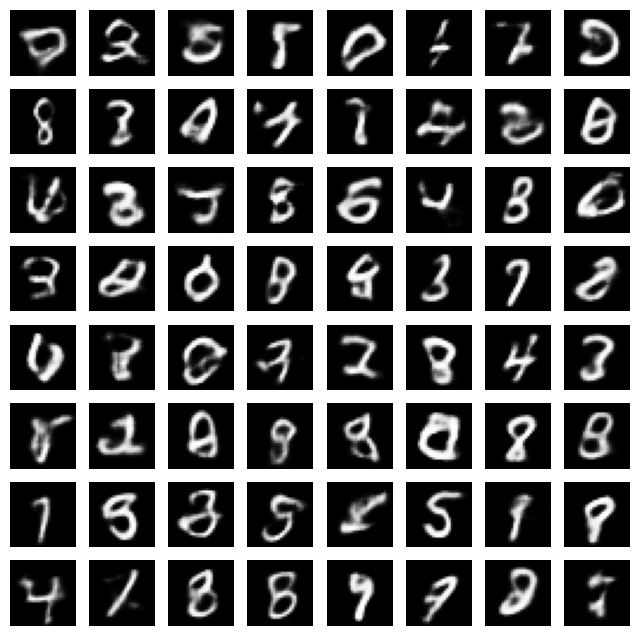

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Preparing the Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Defining the sampling layer
class Sampling(nn.Module):
    def forward(self, z_mean, z_log_var):
        batch, dim = z_mean.size()
        epsilon = torch.randn(batch, dim, device=z_mean.device)
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon

# Defining the VAE Architecture
class VAE(nn.Module):
    def __init__(self, latent_dim=16):
        super(VAE, self).__init__()

        self.latent_dim = latent_dim

        # Defining encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )

        self.fc_mu = nn.Linear(64*7*7, latent_dim)
        self.fc_logvar = nn.Linear(64*7*7, latent_dim)

        # Sampling layer
        self.sampling = Sampling()

        # Defining decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64*7*7),
            nn.ReLU(),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    # Defining foreward
    def forward(self, x):
        # Encoder
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)

        # Sampling
        z = self.sampling(mu, logvar)

        # Decoder
        x_recon = self.decoder(z)

        return x_recon, mu, logvar

# Defining the Loss Function
def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction loss
    recon_loss = nn.BCELoss(reduction='sum')(recon_x, x)

    # KL divergence loss
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return recon_loss + kl_loss

# Training Loop
def train_vae(vae, trainloader, num_epochs=10, learning_rate=1e-3):
    optimizer = optim.RMSprop(vae.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        total_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, _ = data

            optimizer.zero_grad()

            recon_batch, mu, logvar = vae(inputs)
            loss = vae_loss(recon_batch, inputs, mu, logvar)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss / len(trainloader)}")

# Generating Images
def generate_images(vae, num_images=64):
    with torch.no_grad():
        z = torch.randn(num_images, vae.latent_dim)
        generated_images = vae.decoder(z).view(-1, 1, 28, 28)

    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(8, 8, i+1)
        plt.imshow(generated_images[i].squeeze().cpu().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()

# Instantiating the VAE model
vae = VAE()

# Training the VAE model
train_vae(vae, trainloader, num_epochs=10)

# Generating images using the trained VAE
generate_images(vae, num_images=64)
